<a href="https://colab.research.google.com/github/yogita5/ML_bootcamp/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
train="https://raw.githubusercontent.com/yogita5/test/main/linear_train.csv"
df=pd.read_csv(train)

In [2]:
data=df.values

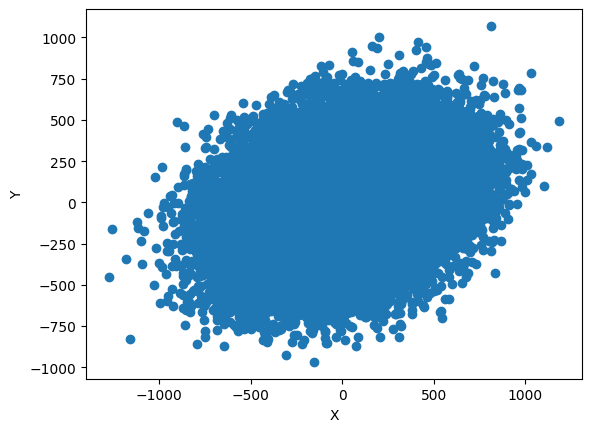

In [3]:
#Extracted the training data from the dataset
X_train=data[:,1:-1]
y_train = data[:,-1]

plt.scatter(X_train[:,0],y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [4]:
#Z-score normalization
def z_score_normalization(X):
      mu = np.mean(X,axis=0)
      sigma = np.std(X,axis=0)
      X_norm = (X-mu)/sigma
      return(X_norm,mu,sigma)

In [5]:
def cost_function(X,y,w,b):
  m = X.shape[0]
  fw_b = np.dot(X,w)+b
  cost = 1/(2*m)*np.sum((fw_b-y)**2)
  return cost

In [6]:
def compute_gradient(X,y,w,b):
  m = X.shape[0]
  fw_b = np.dot(X,w)+b
  dj_dw = 1/m*(np.dot((fw_b-y),X))
  dj_db = 1/m*(np.sum(fw_b-y))
  #print(f"{w}      {b}      {fw_b}     {dj_dw}       {dj_db}  \n")
  return dj_dw,dj_db

In [7]:
def gradient_descent(X,y,w,b,iterations):
  w_calc = w
  b_calc = b
  j_history = []

  for i in range(iterations):
    dj_dw,dj_db = compute_gradient(X,y,w_calc,b_calc)
    w_calc = w_calc-alpha*dj_dw
    b_calc = b_calc-alpha*dj_db
    if i<100000:
      j_history.append(cost_function(X,y,w_calc,b_calc))
    if i%(iterations/10)==0:
      print(f"Iterations: {i}     Cost={j_history[-1]}   w= {w_calc}    b={b_calc}    dj_dw = {dj_dw}      dj_db = {dj_db} \n")
  
  return w_calc,b_calc,j_history

In [8]:
w = np.zeros(X_train.shape[1])

b = 0
alpha = 0.01
num_iter = 1000
iter=np.arange(num_iter)
X_norm,mu,sigma = z_score_normalization(X_train)
w,b,j_hist = gradient_descent(X_norm,y_train,w,b,num_iter)

fw_b = np.dot(X_norm,w)+b

Iterations: 0     Cost=29785.029539374616   w= [0.71184689 0.66256245 0.95976338 0.0106026  0.17130879 0.25007911
 0.72306047 0.31112259 0.20438839 0.92662701 0.40635117 0.37664166
 0.03889836 0.80947445 0.80947445 0.4689766  0.22720383 0.33258239
 0.32344744 0.4154317 ]    b=-0.003656507349305081    dj_dw = [-71.18468877 -66.25624529 -95.97633752  -1.06025977 -17.13087948
 -25.00791143 -72.30604722 -31.11225902 -20.4388385  -92.66270142
 -40.63511706 -37.66416634  -3.88983602 -80.94744465 -80.94744465
 -46.8976605  -22.72038279 -33.25823916 -32.34474437 -41.54317022]      dj_db = 0.3656507349305081 

Iterations: 100     Cost=7772.891408789137   w= [45.89435887 42.2824781  61.65665719  0.8750392  10.99470357 15.91719503
 45.76959112 19.76781507 13.01606998 59.43325747 25.52537996 23.8848613
  2.10990042 35.30010671 35.30010671 29.59490828 14.18379938 21.3485448
 20.94155159 25.83124058]    b=-0.23314914028174052    dj_dw = [-26.73767072 -24.27561098 -35.71818007  -0.64707513  -6.362046

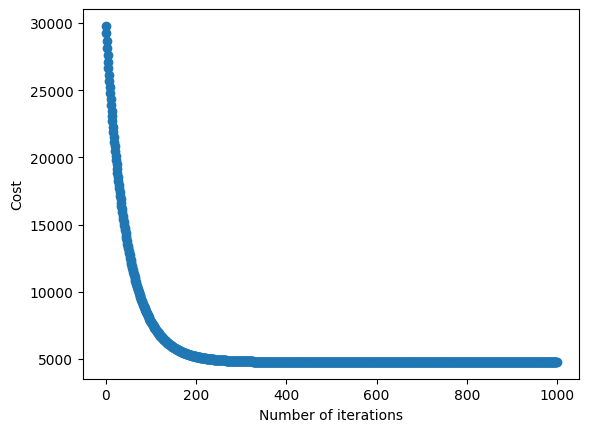

In [9]:
#Cost versus iteration curve
plt.scatter(iter,j_hist)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

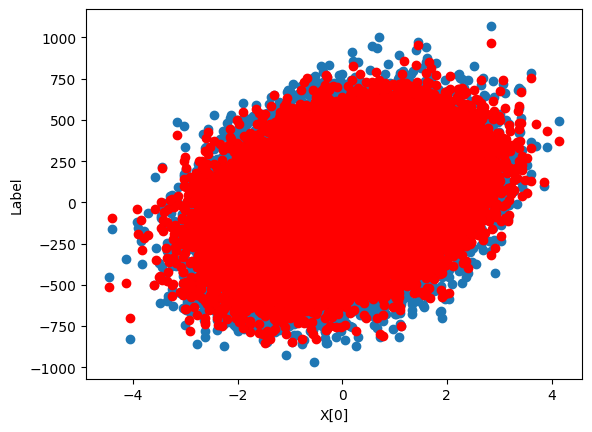

In [10]:
plt.scatter(X_norm[:,0],y_train)
plt.xlabel('X[0]')
plt.ylabel('Label')
plt.scatter(X_norm[:,0],fw_b,color='r')
plt.show()

In [11]:
test="https://raw.githubusercontent.com/yogita5/test/main/linear_test_data.csv"
df2=pd.read_csv(test)

In [12]:
data2 = df2.values
X_test = data2[:,1:]
X_normtest = (X_test-mu)/sigma
Y_predicted = np.dot(X_normtest,w)+b
print(Y_predicted)


[   8.12021811  166.77457352   69.56101491 ...   93.5405833   305.8967363
 -165.01566099]


In [32]:
print(df2.ids)

0        96396
1        80166
2        20516
3        88881
4        69115
         ...  
19995    59011
19996    66308
19997    99637
19998    84616
19999    66210
Name: ids, Length: 20000, dtype: int64


In [37]:
df_predicted = pd.DataFrame(data = Y_predicted, index = df2.ids,)
df_predicted.to_csv(r'Linear_predicted.csv')